In [2]:
!python -V
!pip install turicreate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 16.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 19.6 MB/s eta 0:00:0000:0100:01
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB

In [ ]:
!pip install gensim
!pip install --upgrade numpy

     |████████████████████████████████| 15.7 MB 5.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word
from ast import literal_eval
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Data Cleaning
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
def clean_text(text):
  text = ''.join(filter(whitelist.__contains__, text))
  text = text.lower()
  return text

In [ ]:
from itertools import count
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 40):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 40 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# stemming process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
stemming process. 
'''
stem_process = PorterStemmer()

def tokenize_and_stem(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [stem_process.stem(t) for t in filtered_tokens]
    return lem

In [ ]:
dataset = pd.read_csv('reviews.csv', encoding='ISO-8859-1')

# change name of columns (remove 'IS_')
for col in dataset.columns[15:]:
    dataset = dataset.rename(columns = {col:col[3:]})

# Data Cleaning
dataset['clean_reviewText'] = dataset['reviewText'].apply(clean_text)
dataset['soup'] = dataset['clean_reviewText']

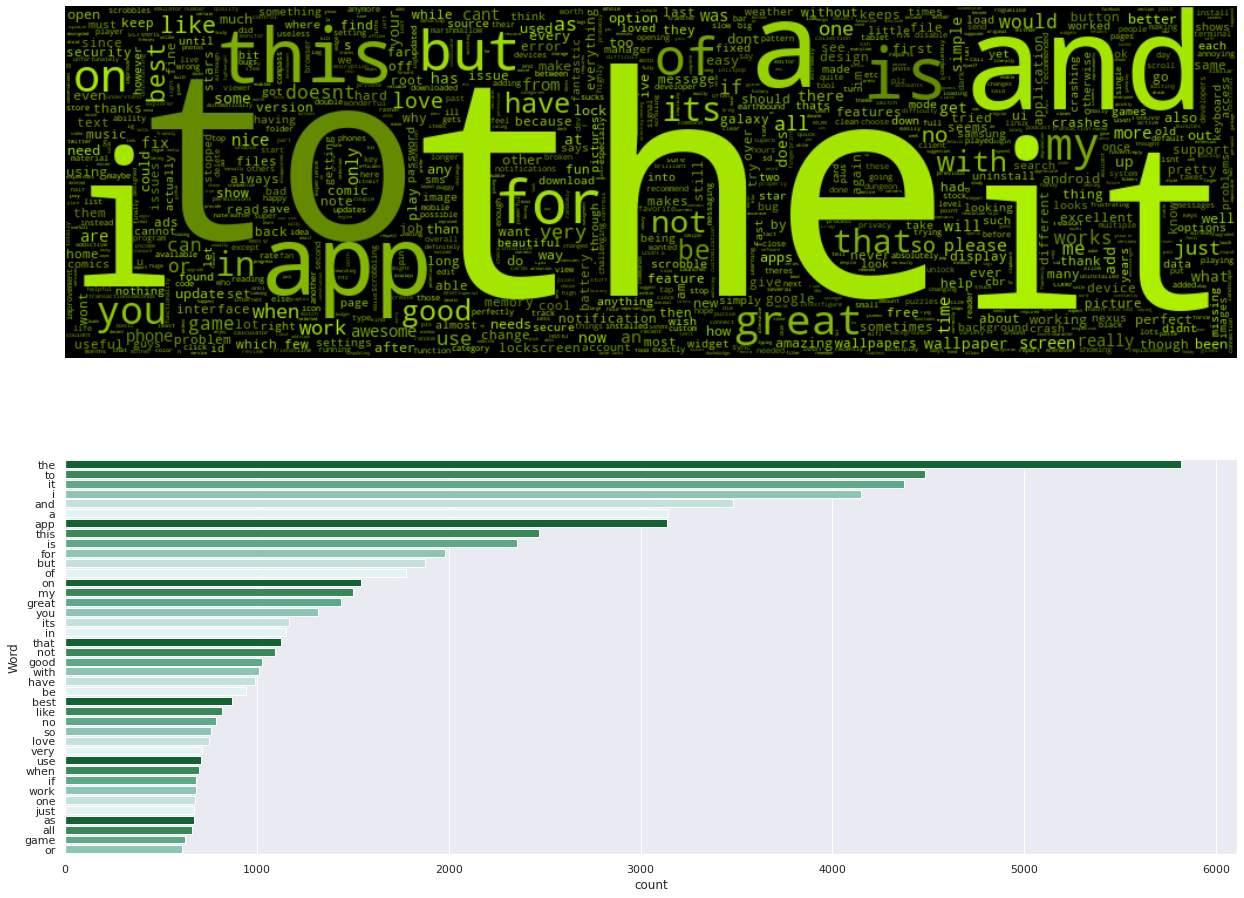

In [ ]:
sns.set()
%matplotlib inline
word = freq_words(dataset['soup'])

In [ ]:
dataset['soup'] = dataset['soup'].apply(lambda x: remove_stopwords(x))

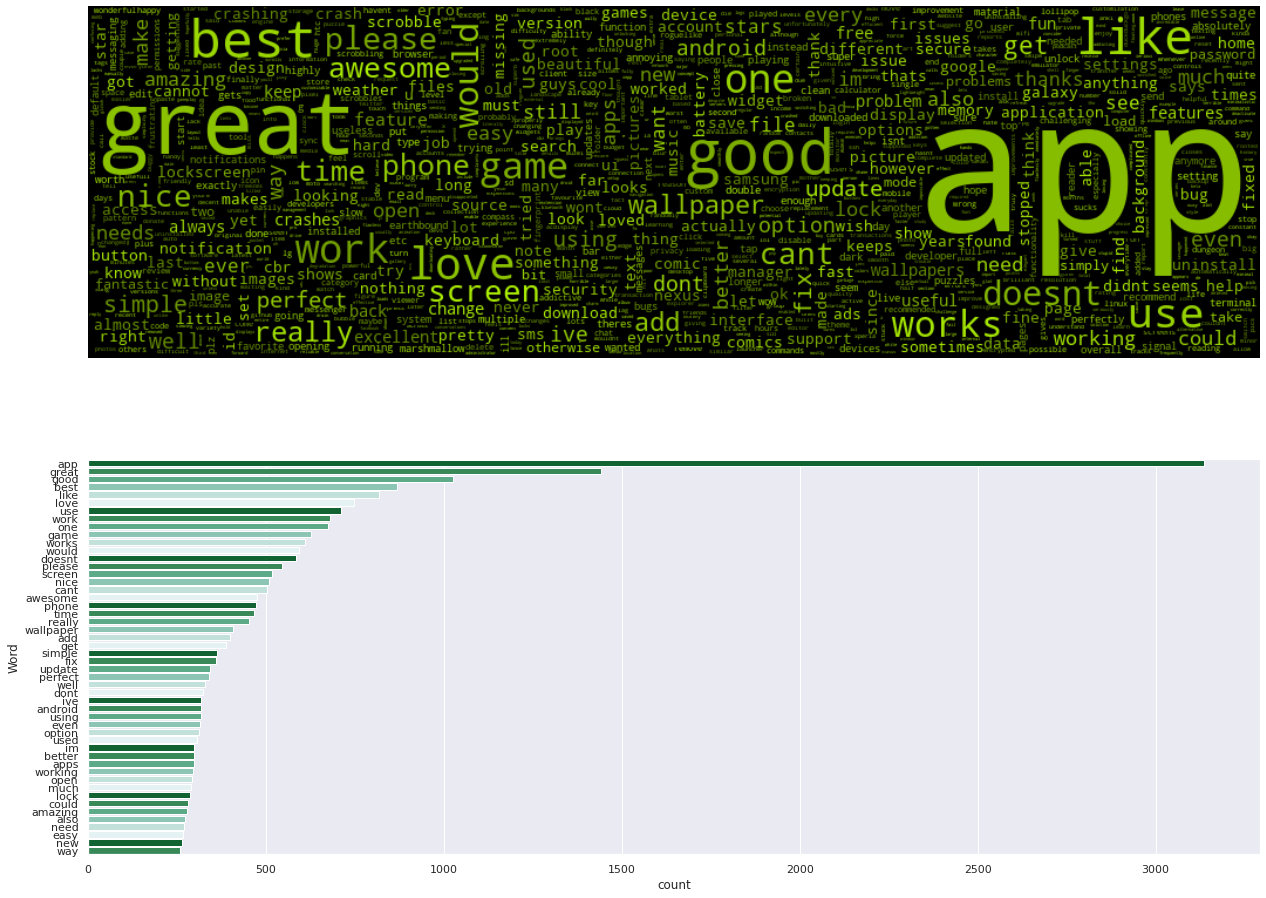

94007


In [ ]:
# # plot 50 most frequent words without stopwords
freq_words(dataset['soup'], 50)


# total words count of user reviews
wordcounts = []
sentences = dataset['soup']
for sentence in sentences:
  words = sentence.split(' ')
  wordcounts.append(len(words))
print(sum(wordcounts))

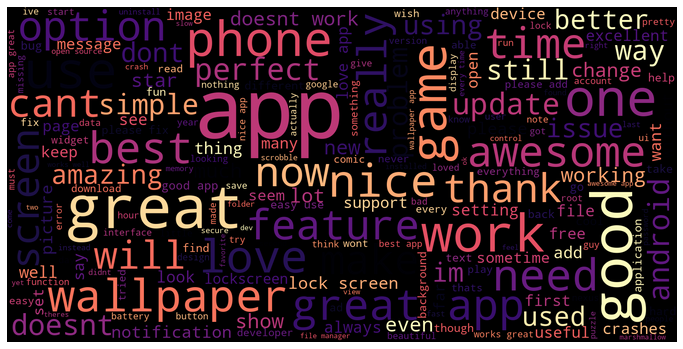

In [ ]:
text = " ".join(review for review in dataset.clean_reviewText)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
import collections
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

def get_performance(y_true, y_pred):
  # classification_result = classification_report(y_true, y_pred, target_names=['0','1'])
  # print(classification_result)
  # Evaluate Performance
  accuracy = round(accuracy_score(y_true, y_pred) * 100, 2)
  # Get precision, recall, f1 scores
  precision, recall, f1score, support = score(y_true, y_pred, pos_label=1, average='binary')
  return accuracy, precision, recall, f1score

In [ ]:
all_categories = ['APP USABILITY', 'UI', 'DEVICE', 'ANDROID VERSION', 'HARDWARE', 'PERFORMANCE', 'BATTERY', 'MEMORY', 'LICENSING', 'PRICE', 'PRIVACY', 'SECURITY', 'USAGE', 'COMPATIBILITY', 'RESSOURCES', 'PRICING', 'PROTECTION', 'ERROR']
# all_categories = ['APP USABILITY', 'UI', 'DEVICE', 'ANDROID VERSION', 'HARDWARE', 'PERFORMANCE', 'BATTERY', 'MEMORY', 'LICENSING', 'PRICE', 'PRIVACY', 'SECURITY']

In [ ]:
# Defining a TF-IDF Vectorizer with Ngram 2 and 3
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), tokenizer=tokenize_and_stem, max_features=1000, use_idf=True)

In [ ]:
import math
import turicreate as tc

In [ ]:
def classification():
  for cat in all_categories:
    
    test_set = pd.read_csv(cat+'_final.csv', encoding='ISO-8859-1')
    test_set['soup'] = test_set['reviewText'].apply(clean_text)
    test_set['soup'] = test_set['soup'].apply(lambda x: remove_stopwords(x))

    # exclude thoses reviews from label_data2 that are in test dataset (by matching ids)
    df = dataset[~dataset._id.isin(test_set._id)]

    # Delete rows with empty subclasses from dataFrame
    indexNames = df[df['subclasses'] == '[]'].index
    df.drop(indexNames , inplace=True)

    # df = dataset.copy()

    # over sampling
    class_count_0, class_count_1 = df[cat].value_counts()
    class_0 = df[df[cat] == 0]
    class_1 = df[df[cat] == 1]
    class_1_over = class_1.sample(2*class_count_0, replace=True)
    df = pd.concat([class_1_over, class_0], axis=0)

    # df = df.sample(n=math.floor(0.8*len(dataset)), replace=False)

    X_train = df['soup']
    y_train = df[cat]
    xtrain_tfidf = tfidf_vec.fit_transform(X_train)

    X_test = test_set['soup']
    y_test = test_set['CORRECT']
    xtest_tfidf = tfidf_vec.transform(X_test)

    data = np.hstack((xtrain_tfidf.todense(), np.expand_dims(y_train.values, 1)))
    train_data_df = pd.DataFrame(data, columns=list(tfidf_vec.vocabulary_.keys()) + ['target'])
    train_data_df['target'] = train_data_df['target'].astype(int)

    # turicreate model
    model = tc.boosted_trees_classifier.create(tc.SFrame(data=train_data_df), target='target', max_iterations=2, max_depth=3)
    
    data = xtest_tfidf.todense()
    test_data_df = pd.DataFrame(data, columns=list(tfidf_vec.vocabulary_.keys()))
    y_pred = model.predict(tc.SFrame(data=test_data_df))


    # Performance metrics
    accuracy, precision, recall, f1score = get_performance(y_test, pd.Series(y_pred))
    print('Performance for ', cat, ' category:')
    print('Precision : ', 100 * precision)
    print('Recall : ', 100 * recall)
    print('F1-score : ', 100 * f1score)


In [ ]:
classification()
